<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610_HW3/blob/master/CAP5610_HW3_Probem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature extraction on cats and dogs dataset with data augmentation

In [0]:
from keras.applications import VGG16
from keras import backend as K
from keras import layers
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, utils

# Import VGG model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [2]:
# Download cats and dogs data set
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 00:50:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   105MB/s    in 0.6s    

2019-04-17 00:50:34 (105 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Process data set
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras import models
from keras import layers

# Add Dense layers on top of model
model = models.Sequential()

vgg.trainable = False

model.add(vgg)

# Flatten output of VGG
model.add(layers.Flatten())

# FC layers and final classification layer
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [24]:
from keras.preprocessing.image import ImageDataGenerator

#Create data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


# Compile model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
# View model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 14,977,953
Trainable params: 263,265
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
# Train model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 714s 7s/step - loss: 0.5565 - acc: 0.7100 - val_loss: 0.3963 - val_acc: 0.8060
Epoch 2/20
100/100 [==============================] - 710s 7s/step - loss: 0.4245 - acc: 0.8135 - val_loss: 0.3002 - val_acc: 0.8720
Epoch 3/20
100/100 [==============================] - 709s 7s/step - loss: 0.3926 - acc: 0.8150 - val_loss: 0.5782 - val_acc: 0.7420
Epoch 4/20
100/100 [==============================] - 710s 7s/step - loss: 0.3877 - acc: 0.8300 - val_loss: 0.2725 - val_acc: 0.8850
Epoch 5/20
100/100 [==============================] - 713s 7s/step - loss: 0.3676 - acc: 0.8315 - val_loss: 0.2738 - val_acc: 0.8840
Epoch 6/20
100/100 [==============================] - 711s 7s/step - loss: 0.3546 - acc: 0.8565 - val_loss: 0.2571 - val_acc: 0.8830
Epoch 7/20
100/100 [==============================] - 712s 7s/step - loss: 0.3417 - acc: 0.8390 - val_loss: 0.2631 - val_acc: 0.8840
Epoch 8/20
100/100 [==============================] - 713s 7s/step - 

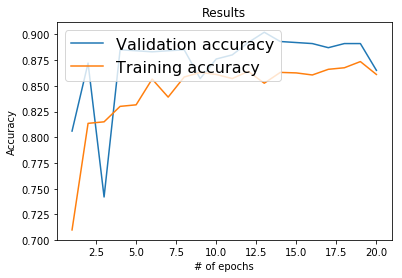

In [27]:
#plot results
import matplotlib as mpl
import matplotlib.pyplot as plt

epoch = []
for i in range(20):
  epoch.append(i+1)
  
plt.plot(epoch, history.history['val_acc'], label='Validation accuracy')
plt.plot(epoch, history.history['acc'], label='Training accuracy')
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Results")
plt.legend(loc="upper left", fontsize=16)
plt.show()